Evaluation Python EDA

1. Expliquer ce qu'est un KPI (Avec vos mots) ?


Définition: Indicateurs clés de performance / Key Performance Indicator

L'indicateur clé de perfomance est une information permettant de définir la valeurs décisionnel d'une information. Cela permet d'identifier rapidement l'information et de la rendre " lisible " à tout type d'utilisateurs.

In [2]:
# Import Pip 
import sys
!{sys.executable} -m pip install numpy panda seaborn

2. Importer les librairies pandas et numpy

In [3]:
#Import interne des librairie
import pandas as pd 
import numpy as np
#Ajout de seabron pour faire jolie 
import seaborn as sb

3. Importer le dataset 

In [4]:
dataframe = pd.read_csv('./csv/eval_data.csv')

4. Afficher les 12 premières lignes du dataset

In [5]:
# 2 méthode possible, faire un sample ou utilisé Head, ici j'ai préférais utilisé Head
dataframe.head(12)

Unnamed: 0  order_id  quantity                              item_name  \
0            0         1         1           Chips and Fresh Tomato Salsa   
1            1         1         1                                   Izze   
2            2         1         1                       Nantucket Nectar   
3            3         1         1  Chips and Tomatillo-Green Chili Salsa   
4            4         2         2                           Chicken Bowl   
5            5         3         1                           Chicken Bowl   
6            6         3         1                          Side of Chips   
7            7         4         1                          Steak Burrito   
8            8         4         1                       Steak Soft Tacos   
9            9         5         1                          Steak Burrito   
10          10         5         1                    Chips and Guacamole   
11          11         6         1                   Chicken Crispy Tacos   

                                   choice_description item_price  
0                                                 NaN        NaN  
1                                        [Clementine]     $3.39   
2                                             [Apple]     $3.39   
3                                                 NaN        NaN  
4   [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   
5   [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...    $10.98   
6                                                 NaN     $1.69   
7   [Tomatillo Red Chili Salsa, [Fajita Vegetables...    $11.75   
8   [Tomatillo Green Chili Salsa, [Pinto Beans, Ch...     $9.25   
9   [Fresh Tomato Salsa, [Rice, Black Beans, Pinto...     $9.25   
10                                                NaN     $4.45   
11  [Roasted Chili Corn Salsa, [Fajita Vegetables,...     $8.75

5. Afficher les dimensions du dataset 

In [6]:
dataframe.size

27732

6. Afficher et décrire les colonnes de notre dataset

In [7]:
dataframe.dtypes

Unnamed: 0             int64
order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

7. Afficher les statistiques descriptives du dataset

In [8]:
dataframe.describe(include='all')

Unnamed: 0     order_id     quantity     item_name  \
count   4622.000000  4622.000000  4622.000000          4622   
unique          NaN          NaN          NaN            50   
top             NaN          NaN          NaN  Chicken Bowl   
freq            NaN          NaN          NaN           726   
mean    2310.500000   927.254868     1.075725           NaN   
std     1334.400802   528.890796     0.410186           NaN   
min        0.000000     1.000000     1.000000           NaN   
25%     1155.250000   477.250000     1.000000           NaN   
50%     2310.500000   926.000000     1.000000           NaN   
75%     3465.750000  1393.000000     1.000000           NaN   
max     4621.000000  1834.000000    15.000000           NaN   

       choice_description item_price  
count                3376       4522  
unique               1043         77  
top           [Diet Coke]     $8.75   
freq                  134        730  
mean                  NaN        NaN  
std                   NaN        NaN  
min                   NaN        NaN  
25%                   NaN        NaN  
50%                   NaN        NaN  
75%                   NaN        NaN  
max                   NaN        NaN

8. Quel est l'item le plus commandé ?

d'après les données visualisé dans le describe, le 'top' des items commandé est : Chicken bowl


Attention à ne pas faire une corrélation avec "choice description" , le Diet coke, n'est pas forcement le plus commandé avec " chicken bowl" /!\ 

9. Combiens d'items ont été commandés au total ? 


In [9]:
dataframe['quantity'].sum()

4972

Via l'information obtenue avec le quantity sum, on obtien un total de 4972 items commandés

10. Combien de chiffre d'affaire à réalisé la société

In [10]:
#Créé une copie pour ne pas créé d'erreur plus tard
dataframeCopied = dataframe.copy()
dataframeCopied['prix_unite'] = dataframeCopied['item_price'].str[1:].astype(float)
dataframeCopied.head(10)

Unnamed: 0  order_id  quantity                              item_name  \
0           0         1         1           Chips and Fresh Tomato Salsa   
1           1         1         1                                   Izze   
2           2         1         1                       Nantucket Nectar   
3           3         1         1  Chips and Tomatillo-Green Chili Salsa   
4           4         2         2                           Chicken Bowl   
5           5         3         1                           Chicken Bowl   
6           6         3         1                          Side of Chips   
7           7         4         1                          Steak Burrito   
8           8         4         1                       Steak Soft Tacos   
9           9         5         1                          Steak Burrito   

                                  choice_description item_price  prix_unite  
0                                                NaN        NaN         NaN  
1                                       [Clementine]     $3.39         3.39  
2                                            [Apple]     $3.39         3.39  
3                                                NaN        NaN         NaN  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98        16.98  
5  [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...    $10.98        10.98  
6                                                NaN     $1.69         1.69  
7  [Tomatillo Red Chili Salsa, [Fajita Vegetables...    $11.75        11.75  
8  [Tomatillo Green Chili Salsa, [Pinto Beans, Ch...     $9.25         9.25  
9  [Fresh Tomato Salsa, [Rice, Black Beans, Pinto...     $9.25         9.25

In [11]:
#Après avoir vérifier que le prix ne contient plus de symbole, on peut passé aux opérations 
dataframeCopied['total_vente'] = dataframeCopied['quantity'] * dataframeCopied['prix_unite']
dataframeCopied.head(5)

Unnamed: 0  order_id  quantity                              item_name  \
0           0         1         1           Chips and Fresh Tomato Salsa   
1           1         1         1                                   Izze   
2           2         1         1                       Nantucket Nectar   
3           3         1         1  Chips and Tomatillo-Green Chili Salsa   
4           4         2         2                           Chicken Bowl   

                                  choice_description item_price  prix_unite  \
0                                                NaN        NaN         NaN   
1                                       [Clementine]     $3.39         3.39   
2                                            [Apple]     $3.39         3.39   
3                                                NaN        NaN         NaN   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98        16.98   

   total_vente  
0          NaN  
1         3.39  
2         3.39  
3          NaN  
4        33.96

In [12]:
#On récupère maintenant la somme de total_vente 
dataframeCopied['total_vente'].sum()

38998.020000000004

Le chiffre d'affaire est estimé à 38 998$ + quelques centimes 

11. Quel est le revenue moyen par commande ? 

In [13]:
dataframeCopied['total_vente'].describe()

count    4522.000000
mean        8.624065
std        12.738030
min         1.090000
25%         4.450000
50%         8.750000
75%        10.980000
max       663.750000
Name: total_vente, dtype: float64

D'après les résultat obtenue on obtien une moyenne de 8.62  avec une variation de 12.73 , la variation étant très important !

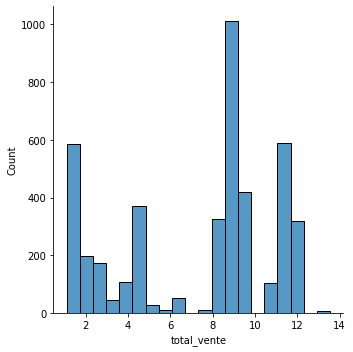

In [17]:
#Petit graph pour faire jolie 
#On enlève les valeur abberante au passage
sb.displot(x="total_vente",data=dataframeCopied.query('total_vente < 15'))